In [14]:
import numpy as np
import cv2
import depthai as dai
import matplotlib.pyplot as plt

(-0.5, 1199.5, 1599.5, -0.5)

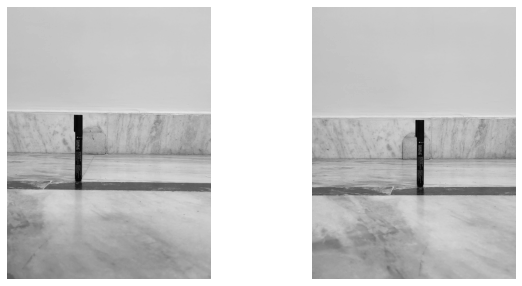

In [55]:
img1 = cv2.imread('m1.jpeg', 0)
img2 = cv2.imread('m2.jpeg', 0)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(img1, 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img2, 'gray')
plt.axis('off')

## Calculating disparity

In [35]:
def calcDisparity(bsize = 5) :
    # initialising the stereo block matching obj
    stereo = cv2.StereoBM_create(numDisparities=32, blockSize=bsize)
    
    # disparity image
    disparity = stereo.compute(img1, img2)
    
    # normalze the image for representation
    min = disparity.min()
    max = disparity.max()
    disparity = np.uint8(255 * (disparity - min)/(max - min))
    
    # plot result
    return disparity
    

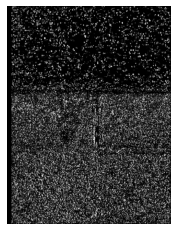

In [56]:
result = calcDisparity()
plt.imshow(result, 'gray')
plt.axis('off')
plt.show()

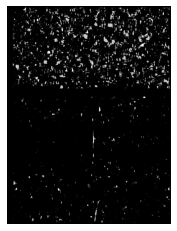

In [57]:
result = calcDisparity(bsize=25)
plt.imshow(result, 'gray')
plt.axis('off')
plt.show()

## Calculating the depth map from the disparity map

In [68]:
# Baseline (D in question) in mm
B = 63.5  

# Focal length of camera (from assignment 1)
f = 13

depth_map = [[9999999 for ele in row] for row in result]

for i in range(len(result)):
    for j in range(len(result[0])):
        # depth = baseline * focal length / disparity
        if int(result[i][j]) != 0:
            depth_map[i][j] = B * f / result[i][j]

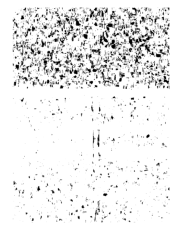

In [69]:
plt.imshow(depth_map, 'gray')
plt.axis('off')
plt.show()